Author: Jacob Graham

Sinan Keten's Computational Nanodynamics Laboratory at Northwestern University

This script plots the harmonic potential between beads meant to represent hydrogen bonds formed in the beta sheet forming region of silk.

The analytical form is introduced in Eq. 11 and plotted in Supplementary Figure 1 of the Supplementary Information of "Predictive modelling-based design and experiments for synthesis and spinning of bioinspired silk fibres." Published in Nature Communications, 2014.

## Load Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set Initial Variables

In [3]:
N = 1001 # Number of data points to be stored in tabulated version of the potential.
f = np.zeros(N) # Force values between two beads.
u = np.zeros(N) # Potential energy values between two beads.
d = np.linspace(0.000,1.000,endpoint=True,num=N) # r/Rc, where r is distance between two beads.
d[0]=0.0000001 # Table cannot start at 0, since this value gives infinite force. See https://matsci.org/t/lammps-users-error-invalid-pair-table-cutoff/11121/3

In [4]:
# Set some variables
# Eo =3.53 #k_B*T
Eo =3.53/2 #k_B*T
Rc = 1.0 # Cutoff distance for interaction.
ro = 0.756*Rc # Distance at which potential well is a minimum value.
kHB =24*ro**2*Eo/(Rc**2-ro**2)**2 # Constant defined on page S20 of Supplementary Information

## Calculate Force and Potential at Each Distance, d

In [5]:
i=0
for r in np.linspace(0.000,0.756,endpoint=True,num=757):
    f[i] = (-1)*kHB*(r-ro)
    u[i] = 0.5*kHB*(r-ro)**2-Eo
    i+=1
for r in np.linspace(0.757,1.000,endpoint=True,num=244):
    f[i] = Eo*12*r*(Rc**2-r**2)*(ro**2-r**2)/(Rc**2-ro**2)**3
    u[i] = (-1)*Eo*(Rc**2-r**2)**2*(Rc**2+2*r**2-3*ro**2)/(Rc**2-ro**2)**3
    i+=1

## Plot the Result

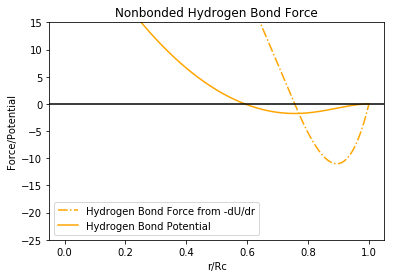

In [9]:
plt.plot(d,f,label = 'Hydrogen Bond Force from -dU/dr',c = 'orange',linestyle='-.')
plt.plot(d,u,label = 'Hydrogen Bond Potential',c='orange')
plt.axhline(y=0,c='k')
plt.legend()
plt.title('Nonbonded Hydrogen Bond Force')
plt.ylim([-25,15])
plt.xlabel('r/Rc')
plt.ylabel('Force/Potential')
# plt.savefig('hbond_potential.png')
plt.show()

## Write Tabulated Potential to File

In [15]:
ff_file = open("hbond.txt","w")
df = pd.DataFrame(d, columns = ['distance'])
df['energy'] = u
df['force'] = f
df.index+=1
ff_file.write(f'# DATE: 2023-9-22    UNITS: lj   CONTRIBUTOR: Jacob\n\
# Short-ranged modified harmonic potential for type A beads\n\n\
HBOND_HARMONIC\n\
N {N} \n\n')
ff_file.close()
df.to_csv('hbond.txt',sep=' ',mode='a',index=True, header=False)